<a href="https://colab.research.google.com/github/Jahnavi-Jaolekar/Netflix-clustering/blob/main/Netflix_movies_and_TV_shows_Clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflx movies and tv shows clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Team
##### **Team Member 1 - Kaustubh Amare**
##### **Team Member 2 - Md Nawab Ali**
##### **Team Member 3 - Jahnavi Jaolekar**


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
!pip install xplotter --upgrade
!pip install pycountry-convert
!pip install geopy
!pip install folium
!pip install geopandas
from xplotter.insights import *
from xplotter.formatter import format_spines
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.cm as cm
!pip install missingno
import missingno as msno
from dateutil.parser import parse
import collections as c
import re
from wordcloud import WordCloud, STOPWORDS
import string, unicodedata
import nltk
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder



import warnings
warnings.filterwarnings('ignore') 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 42.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 217 kB 60.7 MB/s 
     |████████████████████████████████| 316 kB 64.1 MB/s 
     |████████████████████████████████| 298 kB 45.9 MB/s 
     |████████████████████████████████| 297 kB 71.4 MB/s 
     |████████████████████████████████| 297 kB 74.5 MB/s 
     |████████████████████████████████| 297 kB 61.7 MB/s 
     |████████████████████████████████| 296 kB 42.6 MB/s 
     |████████████████████████████████| 296 kB 56.4 MB/s 
     |████████████████████████████████| 280 kB 74.0 MB/s 
     |████████████████████████████████| 280 kB 63.6 MB/s 
     |███████████████████████████████

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
nfx_df=pd.read_csv('/content/drive/MyDrive/capstone project 4/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [4]:
# Dataset First Look
nfx_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
rows=nfx_df.shape[0]
columns=nfx_df.shape[1]
print(f'Number of rows in dataset are {rows}')
print(f'Number of columns in dataset are {columns}')

Number of rows in dataset are 7787
Number of columns in dataset are 12


### Dataset Information

In [6]:
# Dataset Info
nfx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
duplicate = nfx_df.duplicated().sum()
duplicate

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
# function for determination of null values, uniques values in columns and there features.
def Complete_columns_info(df):
        mis_val =df.isna().sum()
        mis_val_percent = 100 *df.isna().sum() / len(df)
        unique_val= df.nunique()
        cci_table = pd.concat([mis_val, mis_val_percent, unique_val], axis=1)
        cci_table = cci_table.rename(columns = {0 : 'No of Null Values', 1 : '% of null values', 2 : 'No of unique values' })
        cci_table['Data Type'] = df.dtypes
        cci_table = cci_table.sort_values('% of null values', ascending=False).round(1)
        print (" selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]),"rows")
        return cci_table

In [9]:
# Calling the function
Complete_columns_info(nfx_df)

 selected dataframe has 12 columns and 7787 rows


,No of Null Values,% of null values,No of unique values,Data Type
director,2389,30.7,4049,object
cast,718,9.2,6831,object
country,507,6.5,681,object
date_added,10,0.1,1565,object
rating,7,0.1,14,object
show_id,0,0.0,7787,object
type,0,0.0,2,object
title,0,0.0,7787,object
release_year,0,0.0,73,int64
duration,0,0.0,216,object


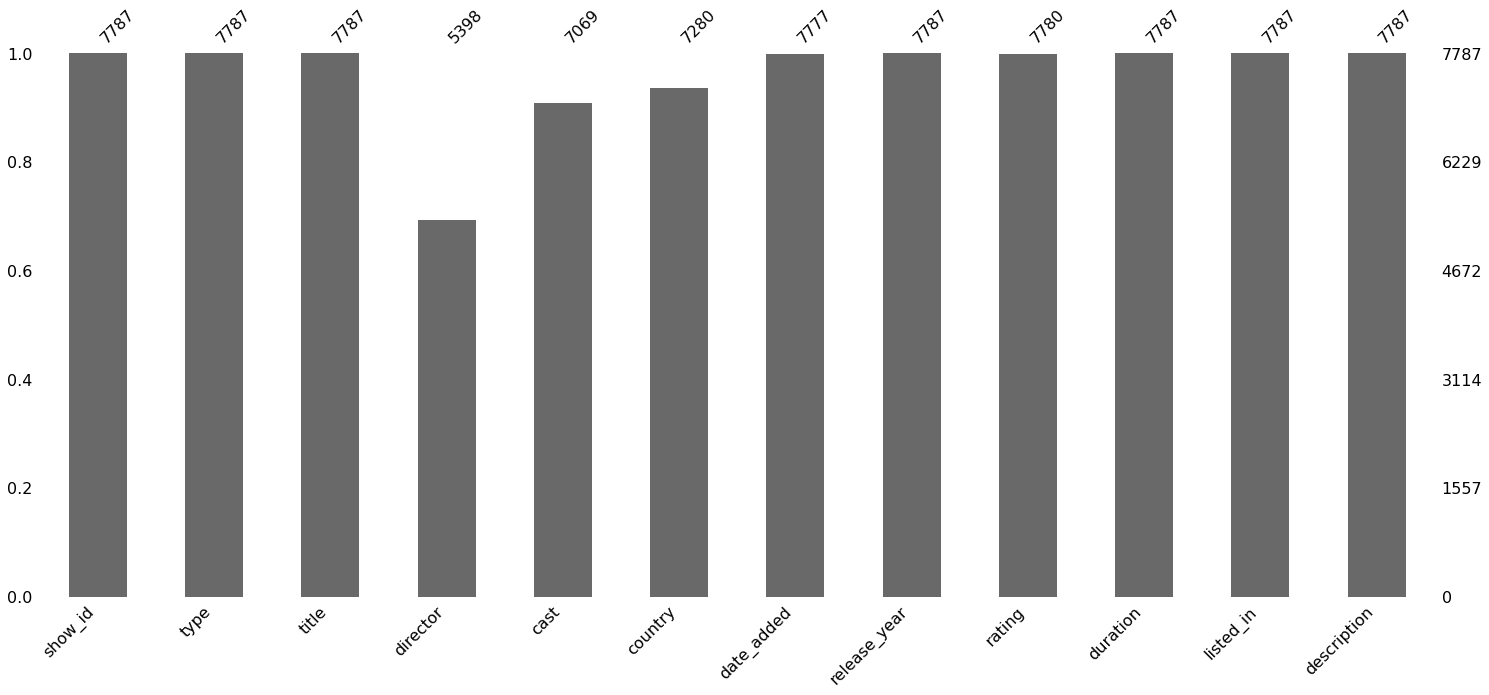

In [10]:
# Visualizing the missing values
msno.bar(nfx_df)

### What did you know about your dataset?

Answer Here - 



*   This dataset has 7787 rows and 12 columns.
*   Dataset is free from duplicate values.

*   Director column has maximum percentage of null values almost 30%, followed by cast and country columns with 9.2 and 6.7 % of null values respectively.
*   All columns have data of object type except release_year which is integer type, which means we have only one numerical column in the dataset.





## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
nfx_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
# Dataset Describe
nfx_df.describe().round(2).style.background_gradient().set_properties(**{'border': '1.3px solid red',
                          'color': 'black'})

,release_year
count,7787.000000
mean,2013.930000
std,8.760000
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description 

Answer Here - 

#### Column Details

| Field | Description || Field | Description |
|-------|-------------||-------|-------------|
|Show_id|Unique id for every movie/TV show||Release_year|Actual release year of the show|
|Type|Identifier - Movie/tv show||Rating|TV rating of the show|
|Title|Title of the show/movie||Duration|Total duration in minutes or number of seasons|
|Director|Director of the show||Listed_in|Genre|
|Cast|Actors involved||Description|Summary description|
|Country|Country of production||Date_added|Date it was added on netflix|



### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for col in nfx_df.columns:
  uniques=nfx_df[col].unique()
  print(uniques)

['s1' 's2' 's3' ... 's7785' 's7786' 's7787']
['TV Show' 'Movie']
['3%' '7:19' '23:59' ... 'Zulu Man in Japan' "Zumbo's Just Desserts"
 "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"]
[nan 'Jorge Michel Grau' 'Gilbert Chan' ... 'Josef Fares' 'Mozez Singh'
 'Sam Dunn']
['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'
 'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato'
 'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim'
 ...
 'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'
 'Nasty C' 'Adriano Zumbo, Rachel Khoo']
['Brazil' 'Mexico' 'Singapore' 'United States' 'Turkey' 'Egypt' 'India'
 'Poland, United States' 'Thailand' 'Nigeria' nan
 'Norway, Iceland, United States' 'United Kingdom' 'Ja

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.
# Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'}
nfx_df['target_ages'] = nfx_df['rating'].replace(ratings)

# Type should be a category
nfx_df['type'] = pd.Categorical(nfx_df['type'])
nfx_df['target_ages'] = pd.Categorical(nfx_df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

# Adding columns of month and year of addition
nfx_df["date_added"] = pd.to_datetime(nfx_df['date_added'])
nfx_df['year'] = nfx_df['date_added'].dt.year
nfx_df['month'] = nfx_df['date_added'].dt.month

#  Creating two extra columns 
tv_shows=nfx_df[nfx_df['type']=='TV Show']
movies=nfx_df[nfx_df['type']=='Movie']

# duration manipulation for movie
movies.duration = movies.duration.str.replace(' min','').astype(int)

# duration manipulation for tv shows
tv_shows.rename(columns={'duration':'seasons'}, inplace=True)
tv_shows.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
tv_shows.seasons = tv_shows.seasons.str.replace(' Seasons','').astype(int)

# Splitting datasets for movies and tv show
df_movies = nfx_df[nfx_df['type']=='Movie'].copy()
df_shows = nfx_df[nfx_df['type']=='TV Show'].copy()

### What all manipulations have you done and insights you found?

Answer Here - We assigned rating column different categories, and converted type column into a catgorical column. A new columns month and year have been added using date added column. Now columns make more sense and are understandable. We are ready to perform EDA on our dataset.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

##**Univariate Analysis**

#### Chart - 1

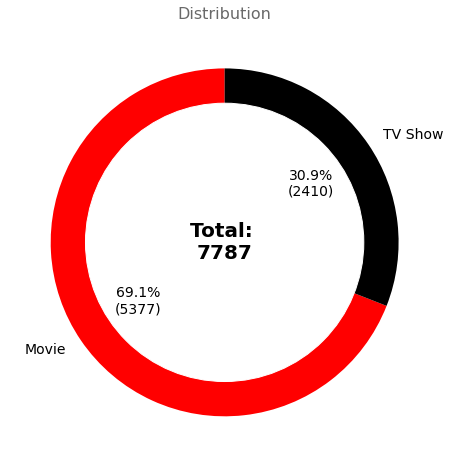

In [15]:
# Chart - 1 visualization code
# pie chart for movie and tv show
plot_donut_chart(df=nfx_df, col='type', colors=['red','black'], title='Distribution')

##### 1. Why did you pick the specific chart?

Answer Here - 

##### 2. What is/are the insight(s) found from the chart?

Answer Here - .

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here - 

#### Chart - 2

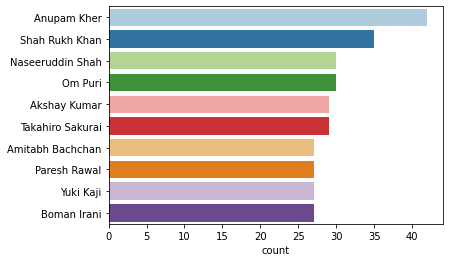

In [16]:
# Chart - 2 visualization code
# Graph for top 10 actors
actors = nfx_df[nfx_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = actors, order=actors.value_counts().index[:10], palette='Paired')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here - Bar charts are one of the most common charts representing data and are very informative and easy to comprehend, ans therefore is main reason to use these to present this data.

##### 2. What is/are the insight(s) found from the chart?

Answer Here -  This chart gives us a list of top 10 actors of movies and series, Anupam Kher and Shahrukh Khan are the best rated actors according to this representation followed by Naseeruddin Shah and Om Puri.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

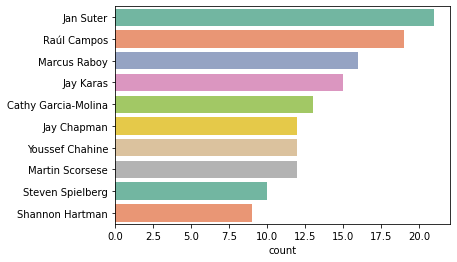

In [17]:
# Chart - 3 visualization code
# Graph for top 10 directors
directors = nfx_df[nfx_df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = directors, order=directors.value_counts().index[:10], palette='Set2')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here - Here also we have used bar charts to present top 10 directors, as these are best to comprehend, and compare this data.

##### 2. What is/are the insight(s) found from the chart?

Answer Here - Jan Suter, Raul Campous are the leading directors from the list tailed by Marcus Raboy and Jay Karas.
 



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

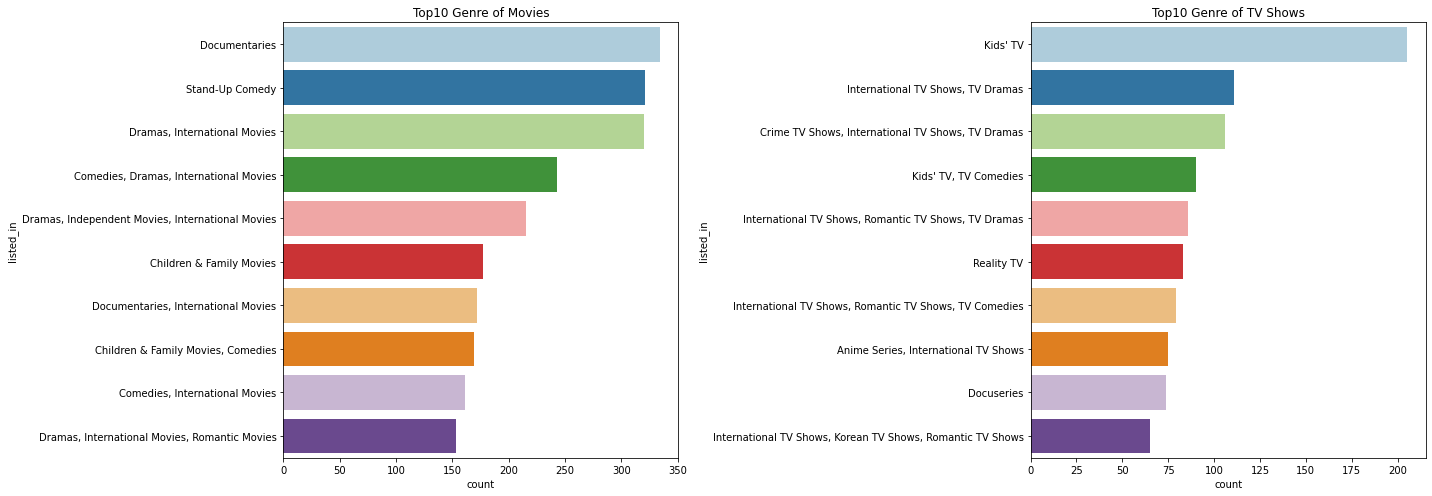

In [18]:
# Chart - 4 visualization code
# #Analysing top10 genre of the movies
figure, ax= plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.countplot(y=movies['listed_in'],data=movies,order=movies['listed_in'].value_counts().index[0:10],  palette='Paired', ax=ax[0])
ax[0].set_title('Top10 Genre of Movies')
# #Analysing top10 genres of TVSHOWS
sns.countplot(y=tv_shows['listed_in'],data=tv_shows,order=tv_shows['listed_in'].value_counts().index[0:10], palette='Paired', ax=ax[1])
ax[1].set_title('Top10 Genre of TV Shows')

plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here - Bar charts are used to measure items across classes, here we have different genres as classes from 'listed_in' column, as we want to compare different genres.

##### 2. What is/are the insight(s) found from the chart?

Answer Here - Above plot clearly suggests most of the netflix movies and series are of documentary type, followed by standup comedy and drama genre. This shows that people prefer more these genres as compared to other genre, there are more views to these genres.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here - Producers can have an insight about top genres and can work accordingly, so that they can bring more content of that genre in order to make profit, they can also try to work on other genres and find what they are lacking in other genres that people are not that implicated towards those genres.

#### Chart - 5

Text(0.5, 0, 'Month -> (Movies added to Netflix) ')

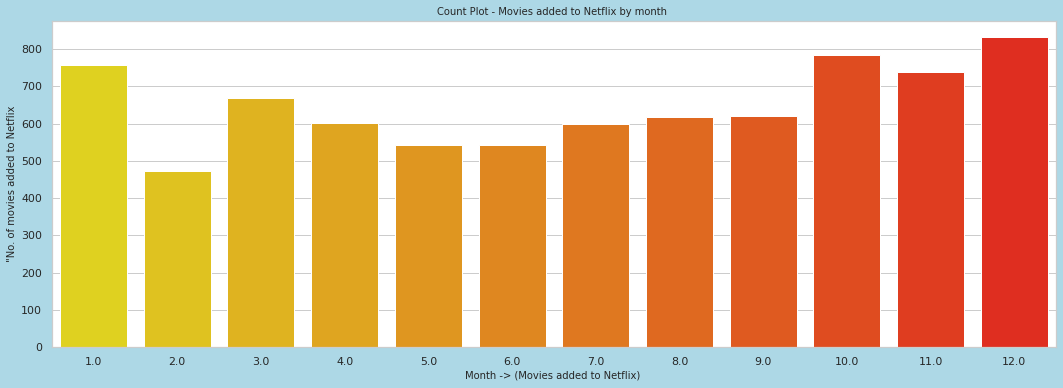

In [19]:
# Chart - 5 visualization code
# Release of movies month-wise
fig = plt.figure(figsize=(18,6))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
sns.countplot(data=nfx_df,x = 'month',palette ="autumn_r")
plt.title('Count Plot - Movies added to Netflix by month ', fontsize=10)
plt.ylabel('"No. of movies added to Netflix', fontsize=10)
plt.xlabel('Month -> (Movies added to Netflix) ', fontsize=10)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here - Most of the movies and series are released in the month of October, December and January.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

Text(0.5, 0, 'Year -> (Movies added to Netflix) ')

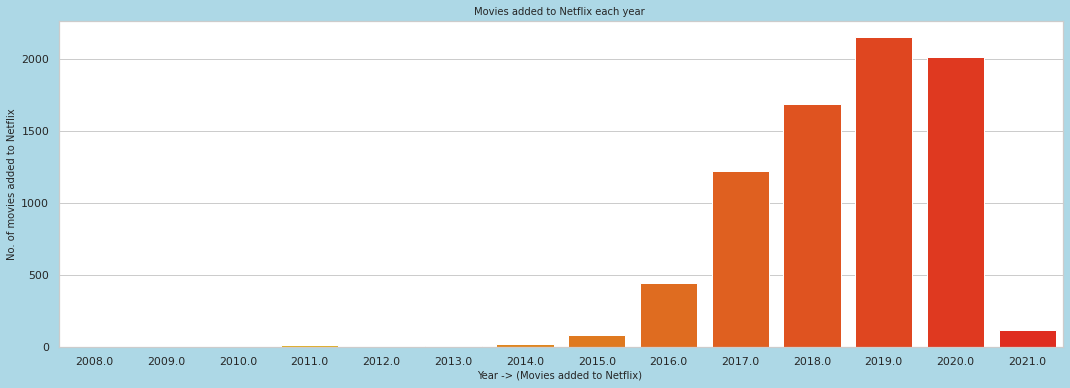

In [20]:
# Chart - 6 visualization code
# Total release for last 10 years
fig = plt.figure(figsize=(18,6))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
sns.countplot(data = nfx_df,x = 'year',palette ="autumn_r")
plt.title('Movies added to Netflix each year ', fontsize=10)
plt.ylabel('No. of movies added to Netflix', fontsize=10)
plt.xlabel('Year -> (Movies added to Netflix) ', fontsize=10)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here - Hike was observed in the year 2019 for movie/series release, and then in 2021 there was sudden drop, reason behind this drop may be corona as shooting were cancelled due to pandemic in 2020. Netflix was not trending before 2015 so there were very less infact no releases before 2014.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

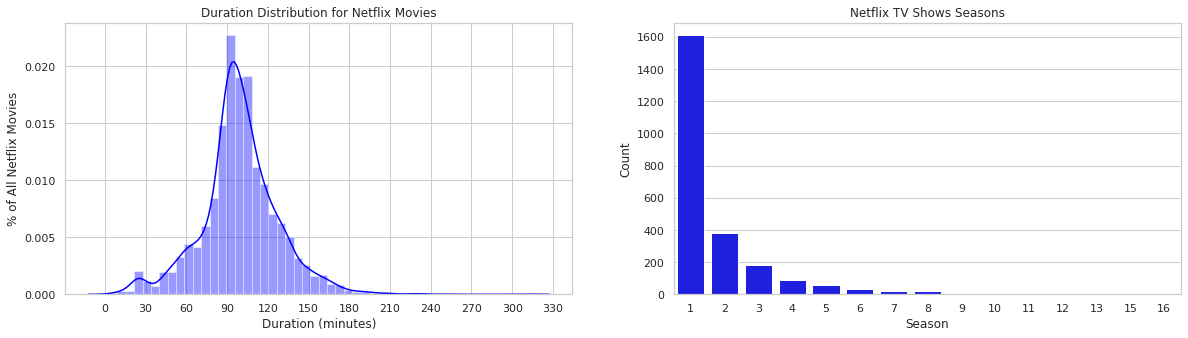

In [21]:
# Chart - 7 visualization code
#ploting a distribution curve for netflix movies duration
fig, ax = plt.subplots(1,2, figsize=(20, 5))
g1 = sns.distplot(movies.duration, color='blue',ax=ax[0]);
g1.set_xticks(np.arange(0,360,30))
g1.set_title("Duration Distribution for Netflix Movies")
g1.set_ylabel("% of All Netflix Movies")
g1.set_xlabel("Duration (minutes)")
#ploting count of seasons fot Netflix TV shows
g2 = sns.countplot(tv_shows.seasons, color='blue',ax=ax[1]);
g2.set_title("Netflix TV Shows Seasons")
g2.set_ylabel("Count")
g2.set_xlabel("Season")
fig.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason

Answer Here.

#### Chart - 8

([<matplotlib.patches.Wedge at 0x7f523a1f5850>,
 [Text(-1.0999663543761926, -0.008603443516892913, 'Others'),
  Text(1.1999632956831192, 0.00938557474570121, 'Originals')],
 [Text(-0.5999816478415596, -0.004692787372850679, '50.25%'),
  Text(0.6999785891484862, 0.005474918601659039, '49.75%')])

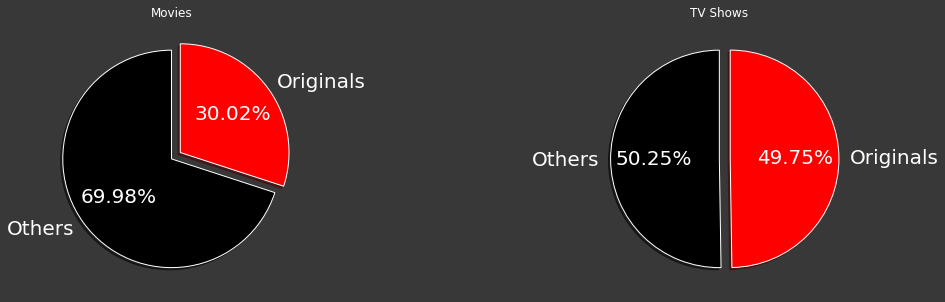

In [22]:
# Chart - 8 visualization code
df_movies['originals'] = np.where(df_movies['release_year'] == df_movies['year'], 'Yes', 'No')
# pie plot showing percentage of originals and others in movies
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,5),facecolor="#383838")
explode = (0, 0.1)
ax[0].set_title('Movies', color='white')
ax[0].pie(df_movies['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"white", 'fontsize': 20}, colors =['black','red'])

df_shows['originals'] = np.where(df_shows['release_year'] == df_shows['year'], 'Yes', 'No')
ax[1].set_title('TV Shows', color='white')
ax[1].pie(df_shows['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"white", 'fontsize': 20}, colors =['black','red'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#**Bivariate Analysis**

#### Chart - 9

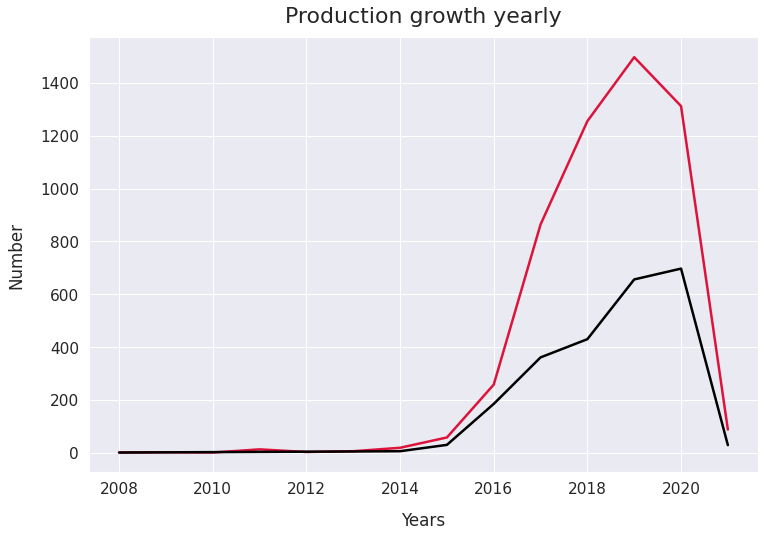

In [23]:
# Chart - 9 visualization code
# visualizing the movies and tv_shows based on the release year
movies_year =movies['year'].value_counts().sort_index(ascending=False)
tvshows_year =tv_shows['year'].value_counts().sort_index(ascending=False)
sns.set(font_scale=1.4)
movies_year.plot(figsize=(12, 8), linewidth=2.5, color='crimson',label="Movies per year",ms=3)
tvshows_year.plot(figsize=(12, 8), linewidth=2.5, color='black',label="TV Shows per year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.title("Production growth yearly", y=1.02, fontsize=22);

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

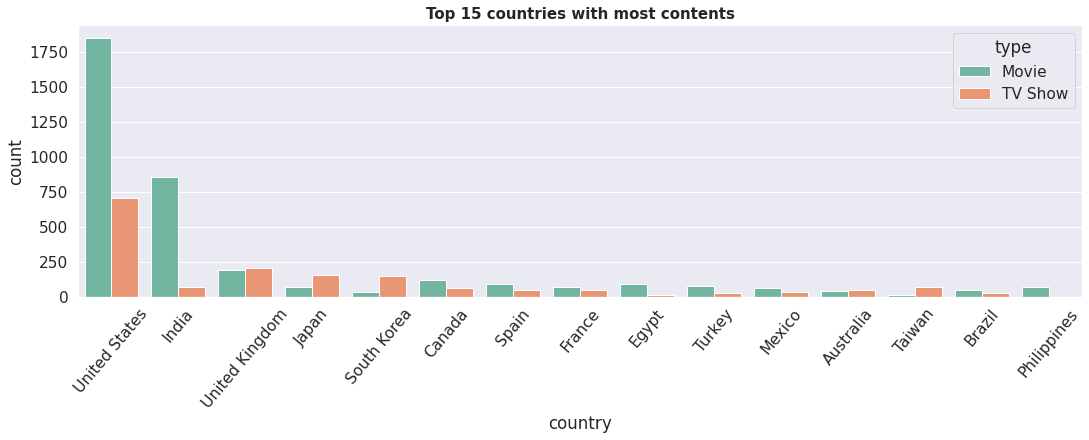

In [24]:
# Chart - 10 visualization code
#Analysing top15 countries with most content 
plt.figure(figsize=(18,5))
sns.countplot(x=nfx_df['country'],order=nfx_df['country'].value_counts().index[0:15],hue=nfx_df['type'], palette='Set2')
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

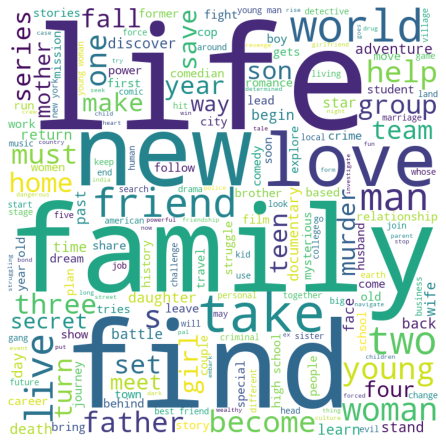

In [25]:
# Chart - 11 visualization code
# Building a wordcloud for the movie descriptions
words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for value in nfx_df.description.values:
    
    # typecaste each val to string
    value = str(value)

    # split the value
    tokens = value.split()
    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)


# plot the WordCloud image                      
plt.figure(figsize = (15,6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

<BarContainer object of 11 artists>

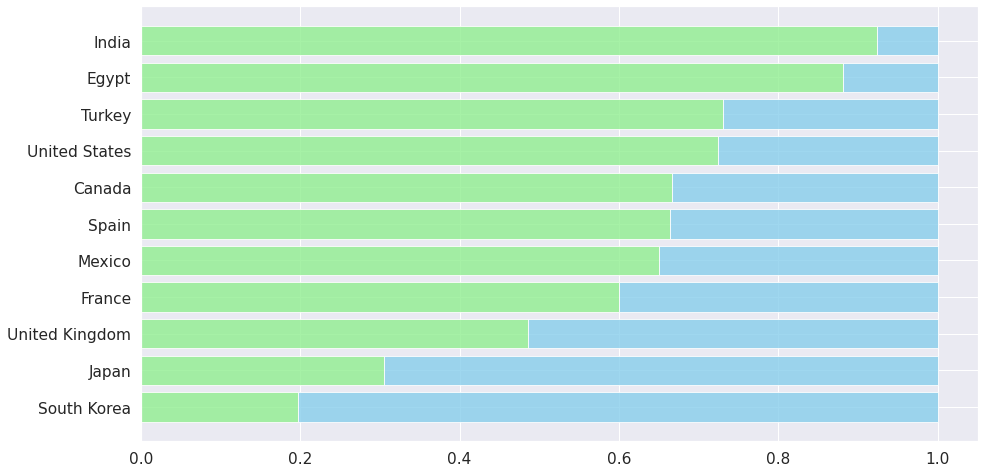

In [26]:
# Chart - 12 visualization code
# Plotting the Horizontal bar plot for top 10 country contains Movie & TV Show split
country_order = nfx_df['country'].value_counts()[:11].index
content_data = nfx_df[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

# Plotting the barh
fig, ax = plt.subplots(1,1,figsize=(15, 8))

ax.barh(content_data_ratio.index, content_data_ratio['Movie'], 
        color='lightgreen', alpha=0.8, label='Movie')
ax.barh(content_data_ratio.index, content_data_ratio['TV Show'], left=content_data_ratio['Movie'], 
        color='skyblue', alpha=0.8, label='TV Show') 

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

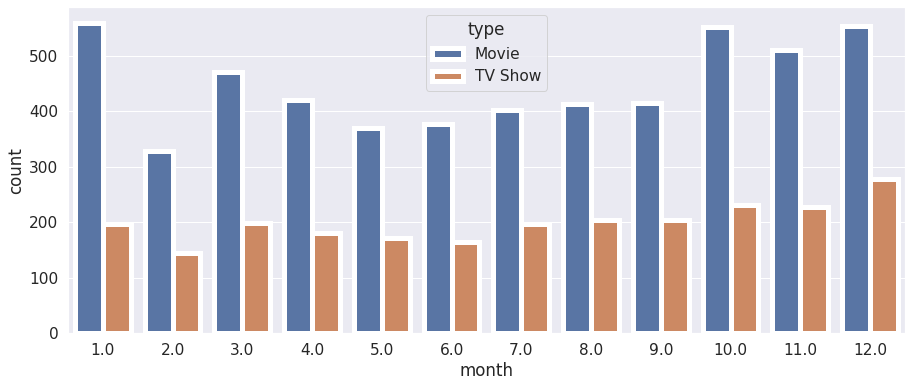

In [27]:
# Chart - 13 visualization code
#ploting monthly release of movies and TV Shows
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='month', hue='type',lw=5, data=nfx_df, ax=ax)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14

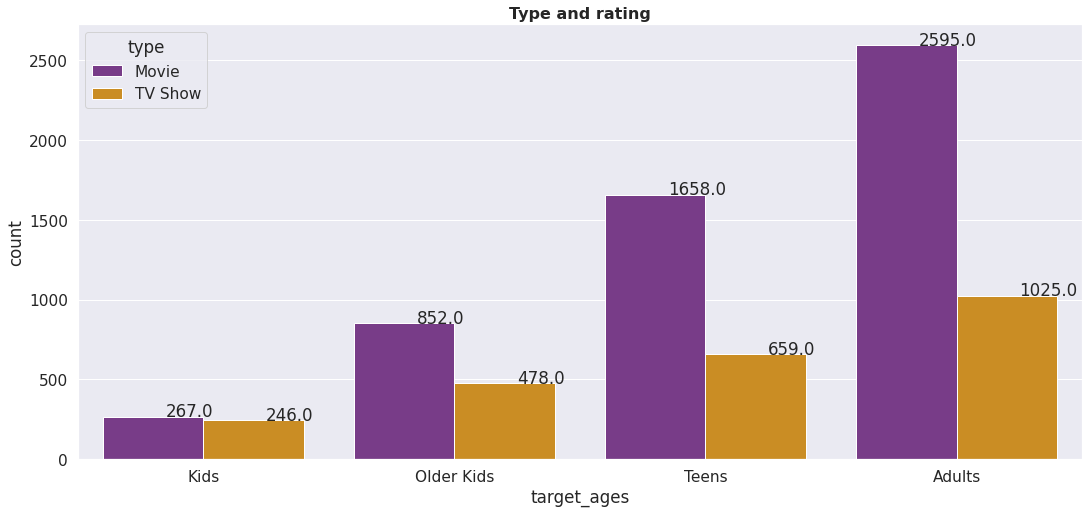

In [28]:
# Chart - 14 visualization code
# Rating
plt.figure(figsize=(18,8))
ax=sns.countplot(x='target_ages',hue='type', data=nfx_df,palette="CMRmap")
plt.title('Type and rating',size='16',fontweight="bold")
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#**Multivariate Analysis**

#### Chart - 14 - Correlation Heatmap

In [29]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [30]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here:



#### 2. Perform an appropriate statistical test.

In [31]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here:



#### 2. Perform an appropriate statistical test.

In [32]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [33]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [34]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here - 

### 2. Handling Outliers

In [35]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [36]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [37]:
# Expand Contraction

#### 2. Lower Casing

In [38]:
# Lower Casing

#### 3. Removing Punctuations

In [39]:
# Remove Punctuations

In [40]:
# Calling our function

#### 4. Removing URLs & Removing words and digits contain digits.

In [41]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [42]:
# Remove Stopwords

In [43]:
# Remove White spaces

#### 6. Rephrase Text

In [44]:
# Rephrase Text

#### 7. Tokenization

In [45]:
# Tokenization

#### 8. Text Normalization

In [46]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [47]:
# POS Taging

#### 10. Text Vectorization

In [48]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [49]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [50]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [51]:
# Transform Your data

### 6. Data Scaling

In [52]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [53]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [54]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [55]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [56]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [57]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [58]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [59]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [60]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [61]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [62]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [63]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [64]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [65]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***